In [6]:
import pandas as pd
import numpy as np
import xlsxwriter

from openpyxl import load_workbook
from math import log10, floor
import matplotlib.pyplot as plt
def round_to_1(x):
    return round(x, -int(floor(log10(x))))
def round_to_reference(x, y):
    return round(x, -int(floor(log10(y))))

import os

eps = 'ε'
Q = 'Q'
G = 'Γ'
I = 'I'
delta = 'δ'
tetta = 'θ'
phi = 'φ'
H = 'Hn'
Hmax = 'Hnmax'

def get_ready_data(name):
    data = pd.read_csv(name, header=0, sep=";")
    data = data.drop(data.columns[2:22], axis=1)
    return data

def find_param(param, print_info = 0, error = True):
    param_value = []
    param_error = []
    param_total = []
    param_model = []
    i=0
    for column in data.columns:
        if (param in column and not('Δ' in column) and (not('†' in column))):
            #print data[column]
                param_value.append(data[column][0])
                param_model.append(column)
        if ('Δ'+param in column):
            #if ('Δ' in column) and (not('†' in column)):
            if (data[column][0] < 0.015) and (data[column][0] != 0):
                param_error.append(0.01)
            elif data[column][0] == 0:
                param_error.append(0.0000001)
            else:
                param_error.append(data[column][0])
        if ('†Δ'+param in column):
            #if ('Δ' in column) and (not('†' in column)):
            if (data[column][0] < 0.015) and (data[column][0] != 0):
                param_error[-1]=(0.01)
            elif data[column][0] == 0:
                param_error[-1]=(0.0000001)
            else:
                param_error[-1]=(data[column][0])

    error_r = list(map(round_to_1, param_error))
    param_r = list(map(round_to_reference, param_value, error_r))


    for i in range(0, len(param_r)):
        if (error_r[i] < 0.000001):
            param_r[i] = round(param_r[i], 1)
            param_total.append(str(param_r[i]))
        else:
            if (error == True):
                param_total.append(str(param_r[i])+'±'+str(error_r[i]))
            else:
                param_total.append(str(param_r[i]))
            
        
    if print_info == 1:
        print (len(param_total), len(param_total)-len(param_model), param_total)
        print (param_model)
    return param_total


        
files_spc = []
for i in os.listdir("."):
    if i.endswith('.spc'):
        files_spc.append(open(i))


#print(data.T.to_string())

def give_links(table, n, path, f_spc_array):
    for f in f_spc_array:
        if n[0:5] in f.name:
            table.loc[charge, '4Fe3+']['data', 'link'] = path+f.name
            print (path+f.name)
 
    table.loc[charge, 'MFe3+']['data', 'link'] = path+n[0:-3]+'mdl'
    table.loc[charge, '4Fe2+']['data', 'link'] = path+n[0:-3]+'html'
    table.loc[charge, '4Fe3+']['data', 'data'] = 'spc'
    table.loc[charge, 'MFe3+']['data', 'data'] = 'mdl'
    table.loc[charge, '4Fe2+']['data', 'data'] = 'html'
    
def give_links_zn(table, n, path, f_spc_array):
    for f in f_spc_array:
        if n[0:5] in f.name:
            table.loc[charge, '4Fe3+']['data', 'link'] = path+f.name
 
    table.loc[charge, 'RelaxFe3+']['data', 'link'] = path+n[0:-3]+'mdl'
    table.loc[charge, '4Fe2+']['data', 'link'] = path+n[0:-3]+'html'
    table.loc[charge, '4Fe3+']['data', 'data'] = 'spc'
    table.loc[charge, 'RelaxFe3+']['data', 'data'] = 'mdl'
    table.loc[charge, '4Fe2+']['data', 'data'] = 'html'
    


path = 'file:///C:/Users/nikvo/Google Drive (ni.vostrov@physics.msu.ru)/VostrovMossb/LiFeZn(y)PO4 y=0.1/0% заряд/'
path2 = 'C:/Users/Сергей/Google Диск/VostrovMossb/LiFeZnPO4/'
path = 'C:/Users/nikvo/Google Drive (ni.vostrov@physics.msu.ru)/VostrovMossb/LiFeZnPO4/'
path = path2

def get_files(folder):
    files = []
    filepath = os.path.join(path, folder)
    for i in os.listdir(filepath):
        if i.endswith('.csv'):
            files.append(open(filepath+i))
    return(files)

files = []
for i in os.listdir("."):
    if i.endswith('.csv'):
        files.append(open(i))
            
def find_name(str_n, f_array):
    for f in f_array:
        if str_n in f.name:
            return f.name

In [27]:
##BETA
def find_param_beta(param, position, print_info = 0, error = True):
    param_value = []
    param_error = []
    param_total = []
    param_model = []
    i=0
    #name = param+position
    for column in data.columns:
        if (param in column and not('Δ' in column) and (not('†' in column))):
            #print data[column]
                param_value.append(data[column][0])
                param_model.append(column)
        if ('Δ'+param in column):
            #if ('Δ' in column) and (not('†' in column)):
            if (data[column][0] < 0.015) and (data[column][0] != 0):
                param_error.append(0.01)
            elif data[column][0] == 0:
                param_error.append(0.0000001)
            else:
                param_error.append(data[column][0])
        if ('†Δ'+param in column):
            #if ('Δ' in column) and (not('†' in column)):
            if (data[column][0] < 0.015) and (data[column][0] != 0):
                param_error[-1]=(0.01)
            elif data[column][0] == 0:
                param_error[-1]=(0.0000001)
            else:
                param_error[-1]=(data[column][0])

    error_r = list(map(round_to_1, param_error))
    param_r = list(map(round_to_reference, param_value, error_r))


    for i in range(0, len(param_r)):
        if (error_r[i] < 0.000001):
            param_r[i] = round(param_r[i], 1)
            param_total.append(str(param_r[i]))
        else:
            if (error == True):
                param_total.append(str(param_r[i])+'±'+str(error_r[i]))
            else:
                param_total.append(str(param_r[i]))
            
        
    if print_info == 1:
        print (len(param_total), len(param_total)-len(param_model), param_total)
        print (param_model)
    return param_total



In [7]:
I1 = []
I2 = []
I3 = []
I4 = []

def append_int(i1, i2, i3, i4, do = False):
    if do == True:
        I1.append(float(i1))
        I2.append(float(i2))
        I3.append(float(i3))
        I4.append(float(i4))
        return 2

In [8]:
f='RT+He_relax_t33ph88_'

In [9]:
    table = pd.DataFrame(columns = ['Intensity', delta, eps, ])
    oney = ['He', 'He', 'He', 'He', 'He', 'He', 'He', 'RT', 'RT', 'RT', 'RT', 'RT', 'data', 'data']
    twoy = [I, delta, Q, H, tetta, phi, G, I, delta, eps, G, Q, 'data', 'link']
    onex = ['0% заряд/', '0% заряд/', '0% заряд/', '0% заряд/', '0% заряд/', '0% заряд/', '0% заряд/',
            '20% заряд/', '20% заряд/', '20% заряд/', '20% заряд/', '20% заряд/', '20% заряд/',
            '50% заряд/', '50% заряд/', '50% заряд/', '50% заряд/', '50% заряд/', '50% заряд/',
            '80% заряд/', '80% заряд/', '80% заряд/', '80% заряд/', '80% заряд/', '80% заряд/',
            '100% заряд/', '100% заряд/', '100% заряд/', '100% заряд/', '100% заряд/', '100% заряд/']
    twox = ['4Fe3+', '.', 'RelaxFe3+', '4Fe2+', '..', "RelaxFe2+", '...',
            '4Fe3+', 'MFe3+', '4Fe2+', '.', "RelaxFe2+", '..',
            '4Fe3+', 'MFe3+', '4Fe2+', '.', "RelaxFe2+", '..',
            '4Fe3+', 'MFe3+', '4Fe2+', '.', "RelaxFe2+", '..',
            '4Fe3+', 'MFe3+', '4Fe2+', '.', "RelaxFe2+", '..']
    arraysy = [oney, twoy]
    arraysx = [onex, twox]
    table = pd.DataFrame(columns=arraysy, index = arraysx).fillna(' ')
    
    charge = '0% заряд/'   
    #files = get_files(charge)
    os.chdir(path+charge)
    files = []
    for i in os.listdir("."):
        if i.endswith('.csv'):
            files.append(open(i))    
    n = find_name('RT+He_relax2x_Zn', files)
    print(n)
    data = get_ready_data(n)
    give_links_zn(table, n, path, files_spc)      

    table.loc[charge, '.']['He', tetta] = 'ln(R)'
    table.loc[charge, '.']['He', phi] = 'α'
    table.loc[charge, '..']['He', tetta] = 'ln(R)'
    table.loc[charge, '..']['He', phi] = 'α'
    
    table.loc[charge, '4Fe3+']['He', 'I'] = find_param('I1')[0]
    table.loc[charge, 'RelaxFe3+']['He', 'I'] = find_param('I2')[0]
    table.loc[charge, '4Fe2+']['He', 'I'] = find_param('I3')[0]
    table.loc[charge, 'RelaxFe2+']['He', 'I'] = find_param('I4')[0]
    
    append_int(find_param('I1')[0], find_param('I2')[0], find_param('I3')[0], find_param('I4')[0])
    
    table.loc[charge, 'RelaxFe3+']['He', delta] = find_param(delta)[1]
    table.loc[charge, '4Fe2+']['He', delta] = find_param(delta)[2]
    table.loc[charge, 'RelaxFe2+']['He', delta] = find_param(delta)[2]
    
    
    table.loc[charge, 'RelaxFe3+']['He', Q] = find_param(eps)[0]
    table.loc[charge, '4Fe2+']['He', Q] = find_param(Q)[1]
    table.loc[charge, 'RelaxFe2+']['He', Q] = find_param(eps)[1]
    
    table.loc[charge, 'RelaxFe3+']['He', H] = find_param('H / 2')[0]
    table.loc[charge, '4Fe2+']['He', H] = find_param('Hn / 3')[0]
    table.loc[charge, 'RelaxFe2+']['He', H] = find_param('H / 4')[0]
    
    table.loc[charge, '4Fe2+']['He', tetta] = find_param(tetta)[1]
    table.loc[charge, '4Fe2+']['He', phi] = find_param(phi)[1]
    table.loc[charge, 'RelaxFe3+']['He', G] = find_param(G)[1]
    table.loc[charge, '4Fe2+']['He', G] = find_param(G)[2]+' '+find_param(G)[3]+' '+find_param(G)[4]
    table.loc[charge, 'RelaxFe2+']['He', G] = find_param(G)[10]

    table.loc[charge, 'RelaxFe2+']['He', tetta] = find_param('ln(R) / 2')[0]
    table.loc[charge, 'RelaxFe2+']['He', phi] = find_param('α / 2')[0]
    table.loc[charge, 'RelaxFe3+']['He', tetta] = find_param('ln(R) / 2')[0]
    table.loc[charge, 'RelaxFe3+']['He', phi] = find_param('α / 4')[0]


    table.loc[charge, '4Fe3+']['RT', 'I'] = find_param('I5')[0]
    table.loc[charge, 'RelaxFe3+']['RT', 'I'] = find_param('I6')[0]
    table.loc[charge, '4Fe2+']['RT', 'I'] = find_param('I7')[0]
    table.loc[charge, 'RelaxFe2+']['RT', 'I'] = find_param('I8')[0]
    table.loc[charge, 'RelaxFe3+']['RT', delta] = find_param('delta6')[0]
    table.loc[charge, '4Fe2+']['RT', delta] = find_param('delta7')[0]
    table.loc[charge, 'RelaxFe2+']['RT', delta] = find_param('delta8')[0]
    table.loc[charge, 'RelaxFe3+']['RT', eps] = find_param('eps6')[0]
    table.loc[charge, '4Fe2+']['RT', eps] = find_param('eps7')[0]
    table.loc[charge, 'RelaxFe2+']['RT', eps] = find_param('eps8')[0]
    table.loc[charge, 'RelaxFe3+']['RT', G] = find_param('Г6')[0]
    table.loc[charge, '4Fe2+']['RT', G] = find_param('Г7')[0]
    table.loc[charge, 'RelaxFe2+']['RT', G] = find_param('Г8')[0]

    tableZn = table

    
    charge = '20% заряд/'   
    #files = get_files(charge)
    os.chdir(path+charge)
    files = []
    for i in os.listdir("."):
        if i.endswith('.csv'):
            files.append(open(i))    
    n = find_name(f, files)
    print(n)
    data = get_ready_data(n)
    #give_links_zn(table, n, path, files_spc)        
    
    
    table.loc[charge, '.']['He', tetta] = 'ln(R)'
    table.loc[charge, '.']['He', phi] = 'α'
    
    table.loc[charge, '4Fe3+']['He', 'I'] = find_param('I1')[1]
    table.loc[charge, 'MFe3+']['He', 'I'] = find_param('I2')[0]
    table.loc[charge, '4Fe2+']['He', 'I'] = find_param('I3')[1]
    table.loc[charge, 'RelaxFe2+']['He', 'I'] = find_param('I4')[0]
    
    append_int(find_param('I1')[1], find_param('I2')[0], find_param('I3')[1], find_param('I4')[0])
    
    table.loc[charge, '4Fe3+']['He', delta] = find_param(delta)[0]
    table.loc[charge, 'MFe3+']['He', delta] = find_param(delta)[1]
    table.loc[charge, '4Fe2+']['He', delta] = find_param(delta)[2]
    table.loc[charge, 'RelaxFe2+']['He', delta] = find_param(delta)[3]

    table.loc[charge, '4Fe3+']['He', Q] = find_param('Q / 1')[0]
    table.loc[charge, 'MFe3+']['He', Q] = find_param('Q / 2')[0]
    table.loc[charge, '4Fe2+']['He', Q] = find_param('Q / 3')[0]

    table.loc[charge, '4Fe3+']['He', H] = find_param('Hn / 1')[0]
    table.loc[charge, 'MFe3+']['He', H] = find_param('Hn / 2')[0]
    table.loc[charge, '4Fe2+']['He', H] = find_param('Hn / 3')[0]
    table.loc[charge, 'RelaxFe2+']['He', H] = find_param('H')[len(find_param('H'))-1]

    table.loc[charge, '4Fe3+']['He', tetta] = find_param(tetta)[0]
    table.loc[charge, 'MFe3+']['He', tetta] = find_param(tetta)[1]
    table.loc[charge, '4Fe2+']['He', tetta] = find_param(tetta)[2]

    table.loc[charge, '4Fe3+']['He', phi] = find_param(phi)[0]
    table.loc[charge, 'MFe3+']['He', phi] = find_param(phi)[1]
    table.loc[charge, '4Fe2+']['He', phi] = find_param(phi)[2]

    table.loc[charge, '4Fe3+']['He', G] = find_param(G)[0]
    table.loc[charge, 'MFe3+']['He', G] = find_param(G)[1]
    table.loc[charge, '4Fe2+']['He', G] = find_param(G)[2]+' '+find_param(G)[3]+' '+find_param(G)[4]
    table.loc[charge, 'RelaxFe2+']['He', G] = find_param(G)[10]

    table.loc[charge, 'RelaxFe2+']['He', tetta] = find_param('ln(R)')[0]
    table.loc[charge, 'RelaxFe2+']['He', phi] = find_param('α')[3]
    table.loc[charge, 'RelaxFe2+']['He', Q] = find_param(eps)[0]

    table.loc[charge, '4Fe3+']['RT', 'I'] = find_param('I5')[0]
    table.loc[charge, 'MFe3+']['RT', 'I'] = find_param('I6')[0]
    table.loc[charge, '4Fe2+']['RT', 'I'] = find_param('I7')[0]
    table.loc[charge, 'RelaxFe2+']['RT', 'I'] = find_param('I8')[0]

    table.loc[charge, '4Fe3+']['RT', delta] = find_param('delta5')[0]
    table.loc[charge, 'MFe3+']['RT', delta] = find_param('delta6')[0]
    table.loc[charge, '4Fe2+']['RT', delta] = find_param('delta7')[0]
    table.loc[charge, 'RelaxFe2+']['RT', delta] = find_param('delta8')[0]

    table.loc[charge, '4Fe3+']['RT', eps] = find_param('eps5')[0]
    table.loc[charge, 'MFe3+']['RT', eps] = find_param('eps6')[0]
    table.loc[charge, '4Fe2+']['RT', eps] = find_param('eps7')[0]
    table.loc[charge, 'RelaxFe2+']['RT', eps] = find_param('eps8')[0]

    table.loc[charge, '4Fe3+']['RT', G] = find_param('Г5')[0]
    table.loc[charge, 'MFe3+']['RT', G] = find_param('Г6')[0]
    table.loc[charge, '4Fe2+']['RT', G] = find_param('Г7')[0]
    table.loc[charge, 'RelaxFe2+']['RT', G] = find_param('Г8')[0]
 

    charge = '50% заряд/'   
    #files = get_files(charge)
    os.chdir(path+charge)
    files = []
    for i in os.listdir("."):
        if i.endswith('.csv'):
            files.append(open(i))    
    n = find_name(f, files)
    print(n)
    data = get_ready_data(n)
    #give_links_zn(table, n, path, files_spc)        
    
    
    table.loc[charge, '.']['He', tetta] = 'ln(R)'
    table.loc[charge, '.']['He', phi] = 'α'
    
    table.loc[charge, '4Fe3+']['He', 'I'] = find_param('I1')[1]
    table.loc[charge, 'MFe3+']['He', 'I'] = find_param('I2')[0]
    table.loc[charge, '4Fe2+']['He', 'I'] = find_param('I3')[1]
    table.loc[charge, 'RelaxFe2+']['He', 'I'] = find_param('I4')[0]
    
    append_int(find_param('I1')[1], find_param('I2')[0], find_param('I3')[1], find_param('I4')[0])
    
    table.loc[charge, '4Fe3+']['He', delta] = find_param(delta)[0]
    table.loc[charge, 'MFe3+']['He', delta] = find_param(delta)[1]
    table.loc[charge, '4Fe2+']['He', delta] = find_param(delta)[2]
    table.loc[charge, 'RelaxFe2+']['He', delta] = find_param(delta)[3]

    table.loc[charge, '4Fe3+']['He', Q] = find_param('Q / 1')[0]
    table.loc[charge, 'MFe3+']['He', Q] = find_param('Q / 2')[0]
    table.loc[charge, '4Fe2+']['He', Q] = find_param('Q / 3')[0]

    table.loc[charge, '4Fe3+']['He', H] = find_param('Hn / 1')[0]
    table.loc[charge, 'MFe3+']['He', H] = find_param('Hn / 2')[0]
    table.loc[charge, '4Fe2+']['He', H] = find_param('Hn / 3')[0]
    table.loc[charge, 'RelaxFe2+']['He', H] = find_param('H')[len(find_param('H'))-1]

    table.loc[charge, '4Fe3+']['He', tetta] = find_param(tetta)[0]
    table.loc[charge, 'MFe3+']['He', tetta] = find_param(tetta)[1]
    table.loc[charge, '4Fe2+']['He', tetta] = find_param(tetta)[2]

    table.loc[charge, '4Fe3+']['He', phi] = find_param(phi)[0]
    table.loc[charge, 'MFe3+']['He', phi] = find_param(phi)[1]
    table.loc[charge, '4Fe2+']['He', phi] = find_param(phi)[2]

    table.loc[charge, '4Fe3+']['He', G] = find_param(G)[0]
    table.loc[charge, 'MFe3+']['He', G] = find_param(G)[1]
    table.loc[charge, '4Fe2+']['He', G] = find_param(G)[2]+' '+find_param(G)[3]+' '+find_param(G)[4]
    table.loc[charge, 'RelaxFe2+']['He', G] = find_param(G)[10]

    table.loc[charge, 'RelaxFe2+']['He', tetta] = find_param('ln(R)')[0]
    table.loc[charge, 'RelaxFe2+']['He', phi] = find_param('α')[3]
    table.loc[charge, 'RelaxFe2+']['He', Q] = find_param(eps)[0]

    table.loc[charge, '4Fe3+']['RT', 'I'] = find_param('I5')[0]
    table.loc[charge, 'MFe3+']['RT', 'I'] = find_param('I6')[0]
    table.loc[charge, '4Fe2+']['RT', 'I'] = find_param('I7')[0]
    table.loc[charge, 'RelaxFe2+']['RT', 'I'] = find_param('I8')[0]

    table.loc[charge, '4Fe3+']['RT', delta] = find_param('delta5')[0]
    table.loc[charge, 'MFe3+']['RT', delta] = find_param('delta6')[0]
    table.loc[charge, '4Fe2+']['RT', delta] = find_param('delta7')[0]
    table.loc[charge, 'RelaxFe2+']['RT', delta] = find_param('delta8')[0]

    table.loc[charge, '4Fe3+']['RT', eps] = find_param('eps5')[0]
    table.loc[charge, 'MFe3+']['RT', eps] = find_param('eps6')[0]
    table.loc[charge, '4Fe2+']['RT', eps] = find_param('eps7')[0]
    table.loc[charge, 'RelaxFe2+']['RT', eps] = find_param('eps8')[0]

    table.loc[charge, '4Fe3+']['RT', G] = find_param('Г5')[0]
    table.loc[charge, 'MFe3+']['RT', G] = find_param('Г6')[0]
    table.loc[charge, '4Fe2+']['RT', G] = find_param('Г7')[0]
    table.loc[charge, 'RelaxFe2+']['RT', G] = find_param('Г8')[0]
    
    
    charge = '80% заряд/'   
    #files = get_files(charge)
    os.chdir(path+charge)
    files = []
    for i in os.listdir("."):
        if i.endswith('.csv'):
            files.append(open(i))    
    n = find_name(f, files)
    print(n)
    data = get_ready_data(n)
    #give_links_zn(table, n, path, files_spc)        
    
    
    table.loc[charge, '.']['He', tetta] = 'ln(R)'
    table.loc[charge, '.']['He', phi] = 'α'
    
    table.loc[charge, '4Fe3+']['He', 'I'] = find_param('I1')[1]
    table.loc[charge, 'MFe3+']['He', 'I'] = find_param('I2')[0]
    table.loc[charge, '4Fe2+']['He', 'I'] = find_param('I3')[1]
    table.loc[charge, 'RelaxFe2+']['He', 'I'] = find_param('I4')[0]
    
    append_int(find_param('I1')[1], find_param('I2')[0], find_param('I3')[1], find_param('I4')[0])
    
    table.loc[charge, '4Fe3+']['He', delta] = find_param(delta)[0]
    table.loc[charge, 'MFe3+']['He', delta] = find_param(delta)[1]
    table.loc[charge, '4Fe2+']['He', delta] = find_param(delta)[2]
    table.loc[charge, 'RelaxFe2+']['He', delta] = find_param(delta)[3]

    table.loc[charge, '4Fe3+']['He', Q] = find_param('Q / 1')[0]
    table.loc[charge, 'MFe3+']['He', Q] = find_param('Q / 2')[0]
    table.loc[charge, '4Fe2+']['He', Q] = find_param('Q / 3')[0]

    table.loc[charge, '4Fe3+']['He', H] = find_param('Hn / 1')[0]
    table.loc[charge, 'MFe3+']['He', H] = find_param('Hn / 2')[0]
    table.loc[charge, '4Fe2+']['He', H] = find_param('Hn / 3')[0]
    table.loc[charge, 'RelaxFe2+']['He', H] = find_param('H')[len(find_param('H'))-1]

    table.loc[charge, '4Fe3+']['He', tetta] = find_param(tetta)[0]
    table.loc[charge, 'MFe3+']['He', tetta] = find_param(tetta)[1]
    table.loc[charge, '4Fe2+']['He', tetta] = find_param(tetta)[2]

    table.loc[charge, '4Fe3+']['He', phi] = find_param(phi)[0]
    table.loc[charge, 'MFe3+']['He', phi] = find_param(phi)[1]
    table.loc[charge, '4Fe2+']['He', phi] = find_param(phi)[2]

    table.loc[charge, '4Fe3+']['He', G] = find_param(G)[0]
    table.loc[charge, 'MFe3+']['He', G] = find_param(G)[1]
    table.loc[charge, '4Fe2+']['He', G] = find_param(G)[2]+' '+find_param(G)[3]+' '+find_param(G)[4]
    table.loc[charge, 'RelaxFe2+']['He', G] = find_param(G)[10]

    table.loc[charge, 'RelaxFe2+']['He', tetta] = find_param('ln(R)')[0]
    table.loc[charge, 'RelaxFe2+']['He', phi] = find_param('α')[3]
    table.loc[charge, 'RelaxFe2+']['He', Q] = find_param(eps)[0]

    table.loc[charge, '4Fe3+']['RT', 'I'] = find_param('I5')[0]
    table.loc[charge, 'MFe3+']['RT', 'I'] = find_param('I6')[0]
    table.loc[charge, '4Fe2+']['RT', 'I'] = find_param('I7')[0]
    table.loc[charge, 'RelaxFe2+']['RT', 'I'] = find_param('I8')[0]

    table.loc[charge, '4Fe3+']['RT', delta] = find_param('delta5')[0]
    table.loc[charge, 'MFe3+']['RT', delta] = find_param('delta6')[0]
    table.loc[charge, '4Fe2+']['RT', delta] = find_param('delta7')[0]
    table.loc[charge, 'RelaxFe2+']['RT', delta] = find_param('delta8')[0]

    table.loc[charge, '4Fe3+']['RT', eps] = find_param('eps5')[0]
    table.loc[charge, 'MFe3+']['RT', eps] = find_param('eps6')[0]
    table.loc[charge, '4Fe2+']['RT', eps] = find_param('eps7')[0]
    table.loc[charge, 'RelaxFe2+']['RT', eps] = find_param('eps8')[0]

    table.loc[charge, '4Fe3+']['RT', G] = find_param('Г5')[0]
    table.loc[charge, 'MFe3+']['RT', G] = find_param('Г6')[0]
    table.loc[charge, '4Fe2+']['RT', G] = find_param('Г7')[0]
    table.loc[charge, 'RelaxFe2+']['RT', G] = find_param('Г8')[0]

    charge = '100% заряд/'   
    #files = get_files(charge)
    os.chdir(path+charge)
    files = []
    for i in os.listdir("."):
        if i.endswith('.csv'):
            files.append(open(i))    
    n = find_name(f, files)
    print(n)
    data = get_ready_data(n)
    #give_links_zn(table, n, path, files_spc)        
    
    
    table.loc[charge, '.']['He', tetta] = 'ln(R)'
    table.loc[charge, '.']['He', phi] = 'α'
    
    table.loc[charge, '4Fe3+']['He', 'I'] = find_param('I1')[1]
    table.loc[charge, 'MFe3+']['He', 'I'] = find_param('I2')[0]
    table.loc[charge, '4Fe2+']['He', 'I'] = find_param('I3')[1]
    table.loc[charge, 'RelaxFe2+']['He', 'I'] = find_param('I4')[0]
    
    append_int(find_param('I1')[1], find_param('I2')[0], find_param('I3')[1], find_param('I4')[0])
    
    table.loc[charge, '4Fe3+']['He', delta] = find_param(delta)[0]
    table.loc[charge, 'MFe3+']['He', delta] = find_param(delta)[1]
    table.loc[charge, '4Fe2+']['He', delta] = find_param(delta)[2]
    table.loc[charge, 'RelaxFe2+']['He', delta] = find_param(delta)[3]

    table.loc[charge, '4Fe3+']['He', Q] = find_param('Q / 1')[0]
    table.loc[charge, 'MFe3+']['He', Q] = find_param('Q / 2')[0]
    table.loc[charge, '4Fe2+']['He', Q] = find_param('Q / 3')[0]

    table.loc[charge, '4Fe3+']['He', H] = find_param('Hn / 1')[0]
    table.loc[charge, 'MFe3+']['He', H] = find_param('Hn / 2')[0]
    table.loc[charge, '4Fe2+']['He', H] = find_param('Hn / 3')[0]
    table.loc[charge, 'RelaxFe2+']['He', H] = find_param('H')[len(find_param('H'))-1]

    table.loc[charge, '4Fe3+']['He', tetta] = find_param(tetta)[0]
    table.loc[charge, 'MFe3+']['He', tetta] = find_param(tetta)[1]
    table.loc[charge, '4Fe2+']['He', tetta] = find_param(tetta)[2]

    table.loc[charge, '4Fe3+']['He', phi] = find_param(phi)[0]
    table.loc[charge, 'MFe3+']['He', phi] = find_param(phi)[1]
    table.loc[charge, '4Fe2+']['He', phi] = find_param(phi)[2]

    table.loc[charge, '4Fe3+']['He', G] = find_param(G)[0]
    table.loc[charge, 'MFe3+']['He', G] = find_param(G)[1]
    table.loc[charge, '4Fe2+']['He', G] = find_param(G)[2]+' '+find_param(G)[3]+' '+find_param(G)[4]
    table.loc[charge, 'RelaxFe2+']['He', G] = find_param(G)[10]

    table.loc[charge, 'RelaxFe2+']['He', tetta] = find_param('ln(R)')[0]
    table.loc[charge, 'RelaxFe2+']['He', phi] = find_param('α')[3]
    table.loc[charge, 'RelaxFe2+']['He', Q] = find_param(eps)[0]

    table.loc[charge, '4Fe3+']['RT', 'I'] = find_param('I5')[0]
    table.loc[charge, 'MFe3+']['RT', 'I'] = find_param('I6')[0]
    table.loc[charge, '4Fe2+']['RT', 'I'] = find_param('I7')[0]
    table.loc[charge, 'RelaxFe2+']['RT', 'I'] = find_param('I8')[0]

    table.loc[charge, '4Fe3+']['RT', delta] = find_param('delta5')[0]
    table.loc[charge, 'MFe3+']['RT', delta] = find_param('delta6')[0]
    table.loc[charge, '4Fe2+']['RT', delta] = find_param('delta7')[0]
    table.loc[charge, 'RelaxFe2+']['RT', delta] = find_param('delta8')[0]

    table.loc[charge, '4Fe3+']['RT', eps] = find_param('eps5')[0]
    table.loc[charge, 'MFe3+']['RT', eps] = find_param('eps6')[0]
    table.loc[charge, '4Fe2+']['RT', eps] = find_param('eps7')[0]
    table.loc[charge, 'RelaxFe2+']['RT', eps] = find_param('eps8')[0]

    table.loc[charge, '4Fe3+']['RT', G] = find_param('Г5')[0]
    table.loc[charge, 'MFe3+']['RT', G] = find_param('Г6')[0]
    table.loc[charge, '4Fe2+']['RT', G] = find_param('Г7')[0]
    table.loc[charge, 'RelaxFe2+']['RT', G] = find_param('Г8')[0]
        
    table  

16237+17059_1024_RT+He_relax2x_Zn0.1_IN.csv
17316+18+21+14_1024_RT+He_relax_t33ph88_Zn0.1_P_CH_20%.csv
17311+13+17297_1024_RT+He_relax_t33ph88_Zn0.1_P_CH.csv
17304+06+090+299_1024_RT+He_relax_t33ph88_Zn0.1_P_CH_80%.csv
17300+17295_1024_RT+He_relax_t33ph88_Zn0.1_F_CH.csv


He                                      \
                                I          δ           Q           Hn   
0% заряд/   4Fe3+             0.0                                       
            .                                                           
            RelaxFe3+    22.5±0.5        0.6  -0.35±0.01        530.0   
            4Fe2+        67.1±0.4        1.4         5.6  123.04±0.05   
            ..                                                          
            RelaxFe2+    10.4±0.4        1.4   1.55±0.01    129.0±3.0   
            ...                                                         
20% заряд/  4Fe3+      18.02±0.01  0.55±0.01  -2.59±0.01    499.2±0.5   
            MFe3+        15.5±0.9  0.55±0.01  -1.85±0.02    519.0±1.0   
            4Fe2+      58.31±0.01  1.35±0.01   5.55±0.01    122.0±0.1   
            .                                                           
            RelaxFe2+     8.2±0.7  1.35±0.01   1.67±0.08     33.0±0.1   
            ..                                                          
50% заряд/  4Fe3+       29.1±0.01  0.55±0.01  -2.59±0.01    498.9±0.2   
            MFe3+        25.2±0.7  0.55±0.01  -2.03±0.01    513.6±0.5   
            4Fe2+       36.6±0.01  1.35±0.01   5.55±0.01        122.0   
            .                                                           
            RelaxFe2+     9.1±0.4  1.35±0.01         1.6         33.9   
            ..                                                          
80% заряд/  4Fe3+       37.4±0.01  0.54±0.01  -2.61±0.01    499.7±0.2   
            MFe3+        35.0±1.0  0.54±0.01  -2.13±0.02    511.0±0.5   
            4Fe2+      18.76±0.01  1.35±0.01   5.54±0.01    121.5±0.3   
            .                                                           
            RelaxFe2+     9.0±0.6  1.35±0.01   1.58±0.05     33.8±0.3   
            ..                                                          
100% заряд/ 4Fe3+      41.02±0.01  0.55±0.01  -2.62±0.01    498.7±0.2   
            MFe3+        48.0±1.0  0.55±0.01  -2.25±0.01    505.7±0.4   
            4Fe2+       2.95±0.01  1.31±0.01     5.5±0.1        122.0   
            .                                                           
            RelaxFe2+     8.2±0.6  1.31±0.01         1.6         32.6   
            ..                                                          

                                                                           \
                              θ          φ                              Γ   
0% заряд/   4Fe3+                                                           
            .             ln(R)          α                                  
            RelaxFe3+       0.0    1.3±0.2                            0.6   
            4Fe2+           0.0        0.0  0.32±0.01 0.28±0.01 0.25±0.01   
            ..            ln(R)          α                                  
            RelaxFe2+       0.0  1.26±0.09                       0.5±0.01   
            ...                                                             
20% заряд/  4Fe3+      33.0±0.3       88.0                      0.34±0.02   
            MFe3+      59.0±0.3       13.9                      0.59±0.02   
            4Fe2+       0.0±2.0    0.0±0.7  0.59±0.05 0.59±0.05 0.59±0.05   
            .             ln(R)          α                                  
            RelaxFe2+       0.0        0.0                            0.3   
            ..                                                              
50% заряд/  4Fe3+      33.9±0.1       88.0                      0.35±0.01   
            MFe3+      55.9±0.2       26.1                      0.57±0.01   
            4Fe2+       0.0±1.0    0.0±2.0  0.47±0.02 0.39±0.02 0.39±0.02   
            .             ln(R)          α                                  
            RelaxFe2+       0.0        0.0                      0.28±0.02   
            ..                                                              
80% 

In [10]:
dep_IHe = []
dep_IRT = []
dep_deltaRT = []
dep_deltaHe = [] 
dep_eps = []
dep_Q = []
dep_H = []
dep_tetta = []
dep_phi = []
dep_GHe = []
dep_GRT = []
deps_He = [dep_IHe, dep_deltaHe, dep_Q, dep_H, dep_tetta, dep_phi]
deps_RT = [dep_IRT, dep_deltaRT, dep_eps, dep_GRT]

import matplotlib

fig = plt.figure(figsize=(13, 17), facecolor='w', edgecolor='k')
gs1 = matplotlib.gridspec.GridSpec(6, 4)
gs1.update(hspace=0.4)
gs1.update(wspace=0.4)

#He
num=0
axs = []

for dep, param in zip(deps_He,[I, delta, Q, H, tetta, phi]):
    t1, t2, t3, t4 = [], [], [], []
    for ch in ['20% заряд/', '50% заряд/','80% заряд/', '100% заряд/']:
        for position, t in zip(['4Fe3+', 'MFe3+', '4Fe2+', "RelaxFe2+",], [t1, t2, t3, t4]):
            if ch == '0% заряд/' and position == 'MFe3+':
                t.append(float(table.loc[ch, 'RelaxFe3+']['He', param]))
            else:                
                if (table.loc[ch, position]['He', param]) == ' ':
                    t.append(0)
                else:
                    t.append(float(table.loc[ch, position]['He', param]))
            if len(t) == 4:
                axs.append(fig.add_subplot(gs1[num]))
                axs[-1].set_title(param+' '+position, fontdict = {'fontsize': 13})
                if param == I:
                    axs[-1].set_ylim([0,60])
                elif param == delta and '3+' in position:
                    axs[-1].set_ylim([0.5,0.6])
                elif param == delta and '2+' in position:
                    axs[-1].set_ylim([1.3,1.4])
                elif param == Q and '3+' in position:
                    axs[-1].set_ylim([-2.8,-1.8])
                elif param == Q and '4Fe2+' in position:
                    axs[-1].set_ylim([5.5,5.7]) 
                elif param == Q and 'RelaxFe2+' in position:
                    axs[-1].set_ylim([1,2])  
                elif param == H and '3+' in position:
                    axs[-1].set_ylim([495,520]) 
                elif param == H and '2+' in position:
                    axs[-1].set_ylim([90,130]) 
                elif param == tetta:
                    axs[-1].set_ylim([30,65]) 
                elif param == phi:
                    axs[-1].set_ylim([0,75]) 
                axs[-1].plot([0.71542,0.531871,0.357777, 0.21127], t)
                plt.gca().invert_xaxis()
                num = num+1


ValueError: could not convert string to float: '18.02±0.01'

<Figure size 936x1224 with 0 Axes>

In [25]:
deps_He

[[], [], [], [], [], []]

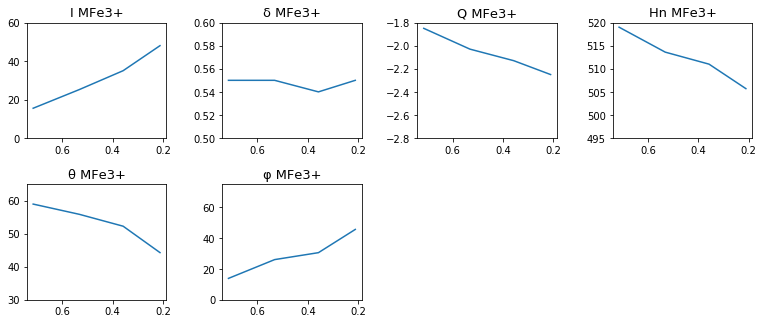

In [45]:
dep_IHe = []
dep_IRT = []
dep_deltaRT = []
dep_deltaHe = [] 
dep_eps = []
dep_Q = []
dep_H = []
dep_tetta = []
dep_phi = []
dep_GHe = []
dep_GRT = []
deps_He = [dep_IHe, dep_deltaHe, dep_Q, dep_H, dep_tetta, dep_phi]
deps_RT = [dep_IRT, dep_deltaRT, dep_eps, dep_GRT]
graphs = []

import matplotlib

fig = plt.figure(figsize=(13, 17), facecolor='w', edgecolor='k')
gs1 = matplotlib.gridspec.GridSpec(6, 4)
gs1.update(hspace=0.4)
gs1.update(wspace=0.4)

#He
num=0
axs = []

for dep, param in zip(deps_He,[I, delta, Q, H, tetta, phi]):
    t1, t2, t3, t4 = [], [], [], []
    for ch in ['20% заряд/', '50% заряд/','80% заряд/', '100% заряд/']:
        for position, t in zip(['MFe3+'], [t2]):
            if ch == '0% заряд/' and position == 'MFe3+':
                t.append(float(table.loc[ch, 'RelaxFe3+']['He', param]))
            else:                
                if (table.loc[ch, position]['He', param]) == ' ':
                    t.append(0)
                else:
                    t.append(float(table.loc[ch, position]['He', param]))
            if len(t) == 4:
                axs.append(fig.add_subplot(gs1[num]))
                axs[-1].set_title(param+' '+position, fontdict = {'fontsize': 13})
                if param == I:
                    axs[-1].set_ylim([0,60])
                elif param == delta and '3+' in position:
                    axs[-1].set_ylim([0.5,0.6])
                elif param == delta and '2+' in position:
                    axs[-1].set_ylim([1.3,1.4])
                elif param == Q and '3+' in position:
                    axs[-1].set_ylim([-2.8,-1.8])
                elif param == Q and '4Fe2+' in position:
                    axs[-1].set_ylim([5.5,5.7]) 
                elif param == Q and 'RelaxFe2+' in position:
                    axs[-1].set_ylim([1,2])  
                elif param == H and '3+' in position:
                    axs[-1].set_ylim([495,520]) 
                elif param == H and '2+' in position:
                    axs[-1].set_ylim([90,130]) 
                elif param == tetta:
                    axs[-1].set_ylim([30,65]) 
                elif param == phi:
                    axs[-1].set_ylim([0,75]) 
                graphs.append(t)
                axs[-1].plot([0.71542,0.531871,0.357777, 0.21127], t)
                plt.gca().invert_xaxis()
                num = num+1
                
graph = pd.DataFrame(graphs)
graph = graph.T
name = r"graph.xlsx"
writer = pd.ExcelWriter(path+name, engine = 'openpyxl')
graph.to_excel(writer, sheet_name='Zn', header=False)
writer.save()
writer.close()

In [20]:
fig = plt.figure(figsize=(13, 11), facecolor='w', edgecolor='k')
gs1 = gridspec.GridSpec(4, 4)

#RT
num=0
axs = []
gs1.update(hspace=0.4)
gs1.update(wspace=0.4)

for dep, param in zip(deps_RT, [I, delta, eps, G]):
    t1, t2, t3, t4 = [], [], [], []
    for ch in ['20% заряд/', '50% заряд/','80% заряд/', '100% заряд/']:
        for position, t in zip(['4Fe3+', 'MFe3+', '4Fe2+', "RelaxFe2+",], [t1, t2, t3, t4]):
            if (table.loc[ch, position]['RT', param]) == ' ':
                t.append(0)
            else:
                t.append(float(table.loc[ch, position]['RT', param]))
            if len(t) == 4:
                axs.append(fig.add_subplot(gs1[num]))
                axs[-1].set_title(param+' '+position, fontdict = {'fontsize': 13})
                if param == I:
                    axs[-1].set_ylim([0,60])
                elif param == delta and '3+' in position:
                    axs[-1].set_ylim([0.3,0.5])
                elif param == delta and '2+' in position:
                    axs[-1].set_ylim([1.1,1.5])
                elif param == eps and '3+' in position:
                    axs[-1].set_ylim([0.5,0.8])
                elif param == eps and '2+' in position:
                    axs[-1].set_ylim([0.9,1.6])  
                elif param == G:
                    axs[-1].set_ylim([0.1,1]) 
                axs[-1].plot([0.71542,0.531871,0.357777 ,0.21127], t)
                plt.gca().invert_xaxis()
                num = num+1

plt.show()


NameError: name 'gridspec' is not defined

<Figure size 936x792 with 0 Axes>

In [68]:
[I, delta, Q, H, tetta, phi, G, I, delta, eps, G, Q,]

[[0.53, 0.53, 0.53, 0.54],
 [0.58, 0.57, 0.56, 0.57],
 [1.35, 1.35, 1.35, 1.35],
 [1.35, 1.35, 1.35, 1.35]]

In [ ]:
    temp.append(float()
    dep_deltaHe.append(temp)

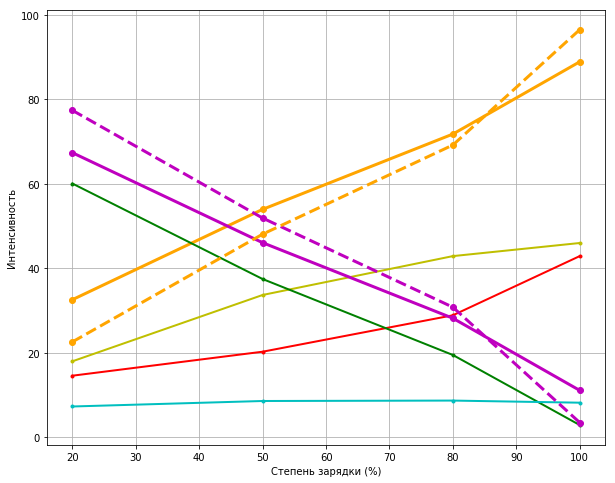

In [21]:


import matplotlib.pyplot as plt 
  
t = [20,50,80,100] 
plt.figure(figsize=(10, 8), facecolor='w', edgecolor='k')

xray2 = [77.4, 51.9, 30.8, 3.5]
xray3 = [22.6, 48.1, 69.2, 96.5]
moss3 = [x + y for x, y in zip(I1, I2)]
moss2 = [x + y for x, y in zip(I3, I4)]
moss3to2 = [x/y for x, y in zip(moss3, moss2)]
plt.plot(t, I1, 'r', linewidth=2.0, marker='.')
plt.plot(t, I2, 'y', linewidth=2.0, marker='.')
plt.plot(t, moss3, '#FFA500', linewidth=3.0, marker='o')

plt.plot(t, I3, 'g', linewidth=2.0, marker='.')
plt.plot(t, I4, 'c', linewidth=2.0, marker='.')
plt.plot(t, moss2, 'm', linewidth=3.0, marker='o')


plt.plot(t, xray2, 'm', linewidth=3.0, linestyle="dashed", marker='o')
plt.plot(t, xray3, '#FFA500', linewidth=3.0, linestyle="dashed", marker='o')

plt.xlabel('Степень зарядки (%)') 
plt.ylabel('Интенсивность') 
plt.grid(True)
plt.show() 


In [137]:
xray2 = [100, 77.4, 51.9, 30.8, 3.5]
xray3 = [0, 22.6, 48.1, 69.2, 96.5]

In [44]:
[x - y for x, y in zip(moss3, xray3)]

[22.6,
 8.339999999999996,
 4.609999999999992,
 2.789999999999992,
 -7.710000000000008]

In [ ]:
I5=[10, 10, 10 , 10, 10]

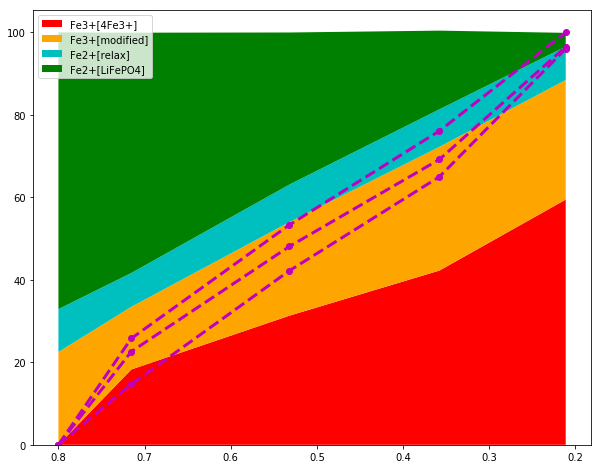

In [70]:
x = [0.8, 0.71542,0.531871,0.357777 ,0.21127]
y = [I1, I2, I4, I3]
 
plt.figure(figsize=(10, 8), facecolor='w', edgecolor='k')
plt.stackplot(x, y, labels=['Fe3+[4Fe3+]','Fe3+[modified]', 'Fe2+[relax]', 'Fe2+[LiFePO4]'], colors = ['r', '#FFA500', 'c', 'g'])
plt.plot(x, nxray3, 'm', linewidth=3.0, linestyle="dashed", marker='o')
#plt.plot(t, moss3, 'k', linewidth=3.0)
low = [0, 14.66667, 42.22222, 65, 96]
high = [0, 25.7778, 53.33333, 76.11111, 100]
plt.plot(x, high, 'm', linewidth=3.0, linestyle="dashed", marker='o')
plt.plot(x, low, 'm', linewidth=3.0, linestyle="dashed", marker='o')
plt.legend(loc='upper left')
plt.gca().invert_xaxis()
plt.show()

In [175]:
I1

[0.0, 18.02, 29.1, 37.4, 41.02]

In [14]:
    os.chdir(path+'20% заряд/')
    files = []
    for i in os.listdir("."):
        if i.endswith('.csv'):
            files.append(open(i)) 
    n = find_name('RT+He_relax_2partialFe3+_2', files)
    data = get_ready_data(n)
    find_param('I2')

['0.0', '14.6']

In [ ]:
I1 = [] 
I2 = [] 
I3 = [] 
I4 = [] 
I5 = [] 

for ch in ['0% заряд/']:
    os.chdir(path+ch)
    files = []
    for i in os.listdir("."):
        if i.endswith('.csv'):
            files.append(open(i)) 
    n = find_name('RT+He_relax2x', files)
    data = get_ready_data(n)
    I1.append(float((find_param('I1')[0]))) 
    I2.append(float((find_param('I2')[0])))    
    I3.append(float((find_param('I3')[0])))        
    I4.append(float((find_param('I4')[0])))

for ch in ['20% заряд/', '50% заряд/','80% заряд/', '100% заряд/']:
    os.chdir(path+ch)
    files = []
    for i in os.listdir("."):
        if i.endswith('.csv'):
            files.append(open(i)) 
    n = find_name('RT+He_relax_t33ph88', files)
    data = get_ready_data(n)
    I1.append(float((find_param('I1')[1]))) 
    I2.append(float((find_param('I2')[0])))    
    I3.append(float((find_param('I3')[1])))        
    I4.append(float((find_param('I4')[0])))

In [63]:
nI1

[0.0,
 16.434,
 28.179,
 38.025,
 53.514,
 0.0,
 16.218,
 26.19,
 33.66,
 36.918000000000006]

In [89]:

I5=[10,10,10,10,10]
nI1=[]    
nI2=[]  
nI3=[]  
nI4=[]  

for i in I1:
    nI1.append(0.9*i)
for i in I2:
    nI2.append(0.9*i)
for i in I3:
    nI3.append(0.9*i)
for i in I4:
    nI4.append(0.9*i)   


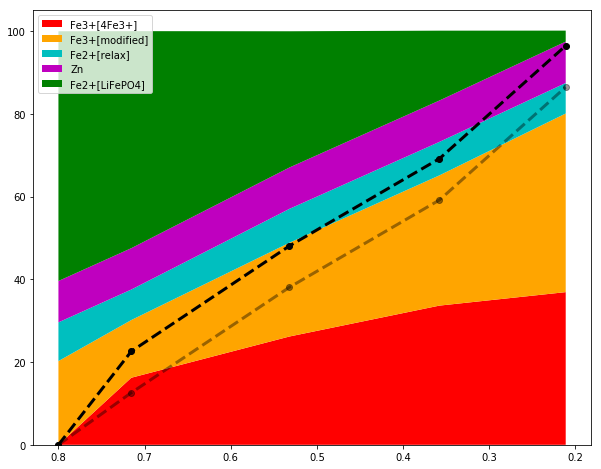

In [90]:
import numpy as np
import matplotlib.pyplot as plt
 
xray2 = [100, 77.4, 51.9, 30.8, 3.5]
nxray3 = [0, 22.6, 48.1, 69.2, 96.5]
x = [0.8, 0.71542, 0.531871, 0.357777, 0.21127]
y = [nI1, nI2, nI4, I5, nI3]
new23 = [0, 12.6, 38.1, 59.2, 86.5]
 
plt.figure(figsize=(10, 8), facecolor='w', edgecolor='k')
plt.stackplot(x, y, labels=['Fe3+[4Fe3+]','Fe3+[modified]', 'Fe2+[relax]', 'Zn', 'Fe2+[LiFePO4]'], colors = ['r', '#FFA500', 'c','m', 'g'])
plt.plot(x, nxray3, 'k', linewidth=3.0, linestyle="dashed", marker='o')
#plt.plot(t, moss3, 'k', linewidth=3.0)
low = [0, 14.66667, 42.22222, 65, 96]
high = [0, 25.7778, 53.33333, 76.11111, 100]
#plt.plot(x, high, 'k', linewidth=3.0, linestyle="dashed", marker='o', alpha=0.4)
plt.plot(x, new23, 'k', linewidth=3.0, linestyle="dashed", marker='o', alpha=0.4)
#plt.plot(x, low, 'k', linewidth=3.0, linestyle="dashed", marker='o', alpha=0.4)
plt.legend(loc='upper left')
plt.gca().invert_xaxis()
plt.show()
 

In [91]:
print(I1) 
print(I2)
print(I3)
print(I4)

[0.0, 18.02, 29.1, 37.4, 41.02]
[22.5, 15.5, 25.2, 35.0, 48.0]
[67.1, 58.31, 36.6, 18.76, 2.95]
[10.4, 8.2, 9.1, 9.0, 8.2]


In [92]:
for i,j in zip(I1, I2):
    print(i/j)

0.0
1.1625806451612903
1.1547619047619049
1.0685714285714285
0.8545833333333334


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

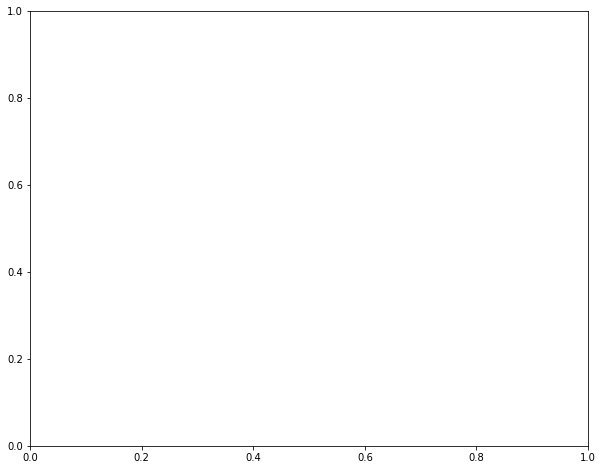

In [115]:
import numpy as np
import matplotlib.pyplot as plt
 

x = [0.71542,0.531871,0.357777,0.21127]
y = [I1, I3, I2, I5, I4 ]
 
plt.figure(figsize=(10, 8), facecolor='w', edgecolor='k')
plt.stackplot(x, y, labels=['Fe3+[4Fe3+]','Fe3+[modified]', 'Fe3+[modified]_lowQ', 'Fe2+[relax]', 'Fe2+[LiFePO4]'], colors = ['r', '#FFA500','bisque', 'c', 'g'])
plt.plot(x, nxray3, 'm', linewidth=3.0, linestyle="dashed", marker='o')
#plt.plot(t, moss3, 'k', linewidth=3.0)

plt.legend(loc='upper left')
plt.gca().invert_xaxis()
plt.show()
 

In [7]:
for i,j in zip(I3, I1):
    print(i/j)

0.625
0.9222133119486767
0.74435318275154
0.575347345920912


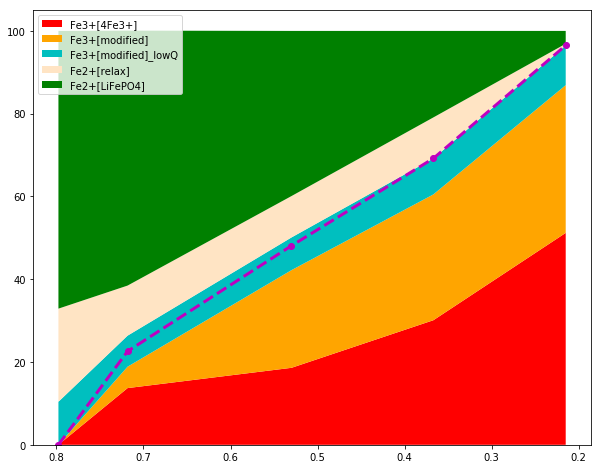

In [10]:
I1 = [] 
I2 = [] 
I3 = [] 
I4 = [] 
I5 = [] 
xray2 = [100, 77.4, 51.9, 30.8, 3.5]
nxray3 = [0, 22.6, 48.1, 69.2, 96.5]

ch = '0% заряд/'
os.chdir(path+ch)
files = []
for i in os.listdir("."):
    if i.endswith('.csv'):
        files.append(open(i)) 
n = find_name('RT+He_relax2x', files)
data = get_ready_data(n)
I1.append(float((find_param('I1')[0]))) 
I2.append(float((find_param('I2')[0])))    
I3.append(float(0))        
I4.append(float((find_param('I3')[0])))
I5.append(float((find_param('I4')[0])))   


for ch in ['20% заряд/', '50% заряд/', '80% заряд/','100% заряд/']:
    os.chdir(path+ch)
    files = []
    for i in os.listdir("."):
        if i.endswith('.csv'):
            files.append(open(i)) 
    n = find_name('RT+He_relax_2partialFe3+_xray', files)
    data = get_ready_data(n)
    I1.append(float((find_param('I1')[0]))) 
    I2.append(float((find_param('I2')[0])))    
    I3.append(float((find_param('I3')[0])))        
    I4.append(float((find_param('I4')[0])))
    I5.append(float((find_param('I5')[0])))   
    
    
import numpy as np
import matplotlib.pyplot as plt
 

x = [0.7977, 0.7183, 0.53 ,0.367 ,0.215]
y = [I1, I3, I5, I2, I4]
#y = [I1[1:], I3[1:], I5, I2[1:], I4[1:]]

 
plt.figure(figsize=(10, 8), facecolor='w', edgecolor='k')
plt.stackplot(x, y, labels=['Fe3+[4Fe3+]','Fe3+[modified]', 'Fe3+[modified]_lowQ', 'Fe2+[relax]', 'Fe2+[LiFePO4]'], colors = ['r', '#FFA500','c', 'bisque', 'g'])
plt.plot(x, nxray3, 'm', linewidth=3.0, linestyle="dashed", marker='o')
#plt.plot(t, moss3, 'k', linewidth=3.0)

plt.legend(loc='upper left')
plt.gca().invert_xaxis()
plt.show()

In [103]:
I1 = [] 
I2 = [] 
I3 = [] 
I4 = [] 
I5 = [] 

ValueError: operands could not be broadcast together with shapes (5,) (10,) 

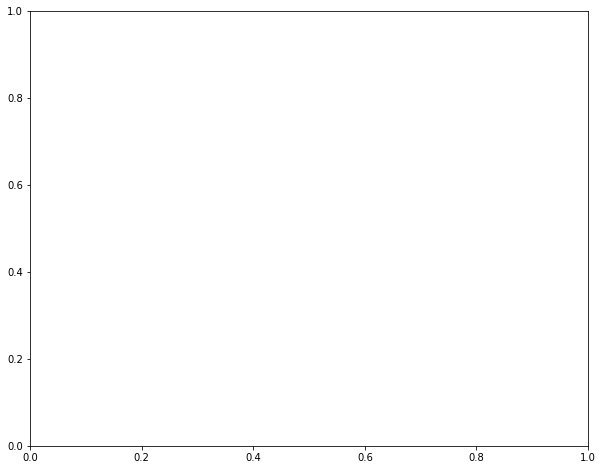

In [123]:

xray2 = [100, 77.4, 51.9, 30.8, 3.5]
nxray3 = [0, 22.6, 48.1, 69.2, 96.5]

ch = '0% заряд/'
os.chdir(path+ch)
files = []
for i in os.listdir("."):
    if i.endswith('.csv'):
        files.append(open(i)) 
n = find_name('RT+He_relax2x', files)
data = get_ready_data(n)
I1.append(float((find_param('I1')[0]))) 
I2.append(float((find_param('I2')[0])))    
I3.append(float(0))        
I4.append(float((find_param('I3')[0])))
I5.append(float((find_param('I4')[0])))   


for ch in ['20% заряд/', '50% заряд/', '80% заряд/','100% заряд/']:
    os.chdir(path+ch)
    files = []
    for i in os.listdir("."):
        if i.endswith('.csv'):
            files.append(open(i)) 
    n = find_name('RT+He_relax_sep', files)
    data = get_ready_data(n)
    I1.append(float((find_param('I1')[0]))) 
    I2.append(float((find_param('I2')[0])))    
    I3.append(float((find_param('I3')[0])))        
    I4.append(float((find_param('I4')[0]))) 
    
    
import numpy as np
import matplotlib.pyplot as plt
 

x = [0.7977, 0.7183, 0.53 ,0.367 ,0.215]
y = [I1, I3, I2, I4]
#y = [I1[1:], I3[1:], I5, I2[1:], I4[1:]]



 
plt.figure(figsize=(10, 8), facecolor='w', edgecolor='k')
plt.stackplot(x, y, labels=['Fe3+[4Fe3+]','Fe3+[modified]', 'Fe3+[modified]_lowQ', 'Fe2+[relax]', 'Fe2+[LiFePO4]'], colors = ['r', '#FFA500','bisque', 'c',  'g'])
plt.plot(x, nxray3, 'm', linewidth=3.0, linestyle="dashed", marker='o')
low = [0, 14.66667, 42.22222, 65, 96]
high = [0, 25.7778, 53.33333, 76.11111, 100]
plt.plot(x, high, 'm', linewidth=3.0, linestyle="dashed", marker='o')
plt.plot(x, low, 'm', linewidth=3.0, linestyle="dashed", marker='o')


#plt.plot(t, moss3, 'k', linewidth=3.0)

plt.legend(loc='upper left')
plt.gca().invert_xaxis()
plt.show()

[0.0, 18.39, 31.31, 42.39, 44.59, 18.87, 31.56, 43.73, 57.2]

ValueError: operands could not be broadcast together with shapes (5,) (15,) 

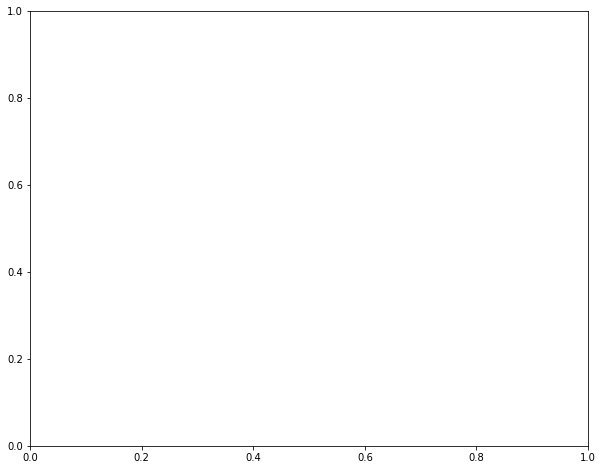

In [102]:
x = [0.7977, 0.7183, 0.53, 0.367 ,0.215]
y = [I1, I2, I4, I3]
plt.figure(figsize=(10, 8), facecolor='w', edgecolor='k')
plt.stackplot(x, y, labels=['Fe3+[4Fe3+]','Fe3+[modified]', 'Fe2+[relax]', 'Fe2+[LiFePO4]'], colors = ['r', '#FFA500','c', 'g'])
plt.plot(x, nxray3, 'm', linewidth=3.0, linestyle="dashed", marker='o')
low = [0, 14.66667, 42.22222, 65, 96]
high = [0, 25.7778, 53.33333, 76.11111, 100]
plt.plot(x, high, 'm', linewidth=3.0, linestyle="dashed", marker='o')
plt.plot(x, low, 'm', linewidth=3.0, linestyle="dashed", marker='o')


#plt.plot(t, moss3, 'k', linewidth=3.0)

plt.legend(loc='upper left')
plt.gca().invert_xaxis()
plt.show()

In [133]:
print(I1)
print(I2)
print(I3)
print(I4)


[0.0, 18.58, 31.31, 42.66, 44.35]
[22.5, 15.0, 22.7, 29.0, 45.0]
[67.1, 58.19, 36.86, 19.04, 2.67]
[10.4, 8.3, 9.1, 9.0, 8.3]


In [7]:
I1[1:]

[12.6, 18.6, 30.1, 51.2]

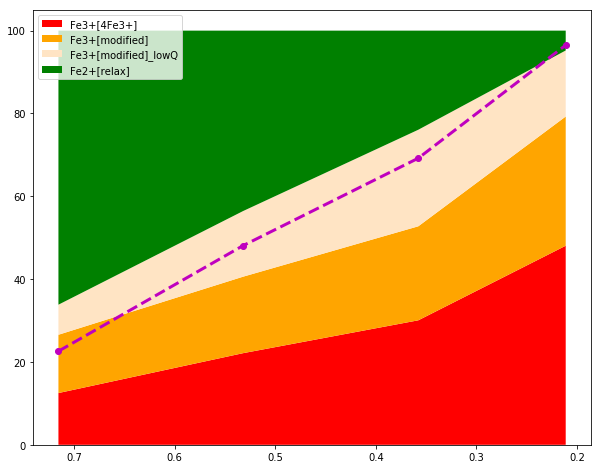

In [9]:
I1 = [] 
I2 = [] 
I3 = [] 
I4 = [] 
I5 = [] 
xray2 = [77.4, 51.9, 30.8, 3.5]
nxray3 = [22.6, 48.1, 69.2, 96.5]

for ch in ['20% заряд/', '50% заряд/', '80% заряд/']:
    os.chdir(path+ch)
    files = []
    for i in os.listdir("."):
        if i.endswith('.csv'):
            files.append(open(i)) 
    n = find_name('RT+He_relax_2partialFe3+_not', files)
    data = get_ready_data(n)
    I1.append(float((find_param('I1')[1]))) 
    I2.append(float((find_param('I2')[1])))    
    I3.append(float((find_param('I3')[0])))        
    I4.append(float((find_param('I4')[1])))
    I5.append(float((find_param('I5')[0])))

    
for ch in ['100% заряд/']:
   
    os.chdir(path+ch)
    files = []
    for i in os.listdir("."):
        if i.endswith('.csv'):
            files.append(open(i)) 
    n = find_name('RT+He_relax_2par', files)
    data = get_ready_data(n)
    I1.append(float((find_param('I1')[1]))) 
    I2.append(float((find_param('I2')[1])))    
    I3.append(float((find_param('I3')[0])))        
    I4.append(float((find_param('I4')[1])))
    I5.append(float((find_param('I5')[0])))
    
nI1 = [] 
nI2 = [] 
nI3 = [] 
nI4 = [] 
nI5 = []     
for i in range(0, 4):
    nI1.append(100*I1[i]/(I1[i]+I2[i]+I3[i]+I4[i]))
    nI2.append(100*I2[i]/(I1[i]+I2[i]+I3[i]+I4[i]))
    nI3.append(100*I3[i]/(I1[i]+I2[i]+I3[i]+I4[i]))    
    nI4.append(100*I4[i]/(I1[i]+I2[i]+I3[i]+I4[i]))       
    
import numpy as np
import matplotlib.pyplot as plt
 

x = [0.71542,0.531871,0.357777,0.21127]
y = [nI1, nI3, nI2, nI4]
 
plt.figure(figsize=(10, 8), facecolor='w', edgecolor='k')
plt.stackplot(x, y, labels=['Fe3+[4Fe3+]','Fe3+[modified]', 'Fe3+[modified]_lowQ', 'Fe2+[relax]', 'Fe2+[LiFePO4]'], colors = ['r', '#FFA500', 'bisque',  'g'])
plt.plot(x, nxray3, 'm', linewidth=3.0, linestyle="dashed", marker='o')
#plt.plot(t, moss3, 'k', linewidth=3.0)

plt.legend(loc='upper left')
plt.gca().invert_xaxis()
plt.show()

ValueError: operands could not be broadcast together with shapes (4,) (5,) 

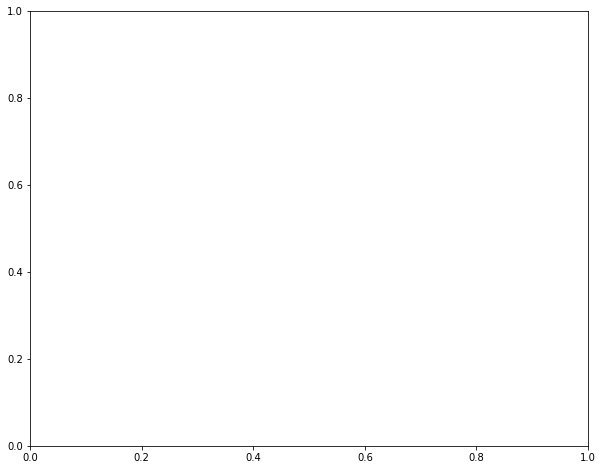

In [113]:
import numpy as np
import matplotlib.pyplot as plt
 

x = [0.71542,0.531871,0.357777,0.21127]
y = [I1, I2, I4, I3]
 
plt.figure(figsize=(10, 8), facecolor='w', edgecolor='k')
plt.stackplot(x, y, labels=['Fe3+(FePO4)','Fe3+(modified)_2', 'Fe2+(relax)', 'Fe2+(LiFePO4)'], colors = ['r', '#FFA500', 'c', 'g'])
plt.plot(x, nxray3, 'm', linewidth=3.0, linestyle="dashed", marker='o')
#plt.plot(t, moss3, 'k', linewidth=3.0)

plt.legend(loc='upper left')
plt.gca().invert_xaxis()
plt.show()
 

In [17]:
pathZn = r"tableZn01.xlsx"
writer = pd.ExcelWriter(path+'tableZn01.xlsx', engine = 'openpyxl')
table.to_excel(writer, sheet_name='Zn')
writer.save()
writer.close()

In [38]:

book = load_workbook(path)
writer.book = book
tableZn.to_excel(writer, sheet_name='Zn')
writer.save()
writer.close()


[22.5, 15.5, 25.2, 35.0, 48.0]